### Importing necessary noUDF

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier

import numpy as np
import os
import sys

### Defining the path to necessary packages.

In [2]:
module_path = os.path.join(os.path.dirname( os.getcwd())) #Find the directory where we can find the 'Modules' library.
sys.path.append(module_path)

from Modules.Classes import MultiOutputLinearRegression, ModelComparator


### Defining constants for the models.

In [3]:
#The datatype of each feature of the dataframe.
dtypes = { "Make": "string", 
            "Model":"string",
            "Vehicle Class":"string",
            "Engine Size(L)":np.float64,
            "Cylinders":np.int16,
            "Transmission":"string",
            "Fuel Type":"string",
            "Fuel Consumption City (L/100 km)":np.float64,
            "Fuel Consumption Hwy (L/100 km)":np.float64,
            "Fuel Consumption Comb (L/100 km)":np.float64,
            "Fuel Consumption Comb (mpg)":np.float64,
            "CO2 Emissions(g/km)":np.float64}


# Define the dictionary of  ML models we will be training.
Models = {
    "DecisionTree": DecisionTreeClassifier(criterion="gini", splitter="best", min_samples_split=2), 
    "RandomForest": RandomForestClassifier(n_estimators=15, criterion='gini'), 
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "LogReg": LogisticRegression(max_iter = 200,),
   "LinReg":MultiOutputLinearRegression(LinearRegression())
}    

#For each ML model create it's corresponding parameter space.
Models_hipparams = {"DecisionTree":{"criterion":['gini','entropy'],
                                       "splitter":['best','random'],
                                       "min_samples_split":[2,3],
                                        "min_samples_leaf":[2,3]},

                    "RandomForest":{"n_estimators":list(range(5, 25, 5)),
                                        "min_samples_split":[2,3],
                                       "min_samples_leaf":[2,3]},
                                       
                  "KNN": {"n_neighbors":list(range(1, 10, 2)),
                            "p":[1,2]},
                            
                        "LogReg": {
                        "max_iter":[250, 300],
                            "penalty":['l2'],
                              "solver":['liblinear','newton-cg',],
                              
                        },
                     "LinReg":{},
                             }



### Exploratory Data Analysis (EDA) section.

In [4]:

target_var: str = "CO2 Emissions(g/km)" #The target variable's name
file_name:str = "CO2Emission.csv" #The filename


n_splits:int = 2 # How many times we'll be learning each model.
train_size:float = 0.8 #The size of training set
test_size:float  = 1 - train_size #The size of testing set.


ModelComparator = ModelComparator(Filename = file_name, target_var = target_var, dtypes = dtypes, 
                                        Models = Models, Models_hipparams = Models_hipparams, 
                                        n_splits = n_splits, train_size  = train_size, test_size = test_size, 
                                        bins = [-float('inf'), 150, 250, float('inf')], show_plots = False
                                        )

ModelComparator.descriptive_statistics()


### Training-the-models section.

In [5]:
ModelComparator.train_models()

0


c:\Users\pawel\AppData\Local\Programs\Python\Python312\Lib\site-packages\prince\pca.py:175: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-0.1401346422614348, -0.1206606721314831, -0.2772326913012272, -0.11491158524078204, -0.37978369187675887, -0.16354793239068163, -0.20572473847593545, -0.3972139302469871, -0.15173506978750717, -0.25826444741985577, -0.4114494769518709, -0.30402747730730956, -0.24549435688400797, -0.2334771860611605, -0.17063995897339673, -0.20979889118351344, -0.2634562118349593, -0.24411127907894137, -0.1572146243969032, -0.2192682167388766, -0.16041253740516406, -0.12479880540984786, -0.21771859861645051, -0.33223112165892477, -0.23275097221466082, -0.2685476239101185, -0.18492354031047958, -0.31817577202894154, -0.1582877742228606, -0.11637548610733041, -0.20072662991238713, -0.23129170408497998, -0.1774487672755663, -0.5243358193604213, -0.4098003742156618, -0.5510966028915791, -0.30179195082237514, -0.14948701855038718, -0.1990327

1


c:\Users\pawel\AppData\Local\Programs\Python\Python312\Lib\site-packages\prince\pca.py:175: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-0.13892133247839358, -0.11040347997253397, -0.28801463386630966, -0.37844406268699354, -0.16560521995880095, -0.19988146140104263, -0.40313650938684464, -0.15935369720403486, -0.261521378709128, -0.14133753679015437, -0.41554360243619143, -0.2984072611652861, -0.23707488929002463, -0.23202248538170148, -0.1716291844139873, -0.20572473847593545, -0.2647382447678514, -0.24823739572950007, -0.15613409871034392, -0.22309517608564877, -0.11342879298653222, -0.21849478146555132, -0.33476921142719646, -0.23275097221466082, -0.16041253740516406, -0.271681307838081, -0.18400579995422325, -0.3160403400351626, -0.16354793239068163, -0.11491158524078204, -0.19298691110661623, -0.2967004372825619, -0.2305586065068186, -0.18215644849540122, -0.5236896874829868, -0.4151360068477313, -0.5504818825631803, -0.29383369916131774, -0.15061

### Visualization the results section.

c:\Users\pawel\OneDrive\Życie\Praca\Programowanie\AllGitHubRepositories\Wsp-pracaNaukowa\Modules\Classes.py:885: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = metrics_dataframe_melted, y = "metric_value", x = "train_type",ax = boxplot_axes,
c:\Users\pawel\OneDrive\Życie\Praca\Programowanie\AllGitHubRepositories\Wsp-pracaNaukowa\Modules\Classes.py:885: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = metrics_dataframe_melted, y = "metric_value", x = "train_type",ax = boxplot_axes,
c:\Users\pawel\OneDrive\Życie\Praca\Programowanie\AllGitHubRepositories\Wsp-pracaNaukowa\Modules\Classes.py:885: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remo

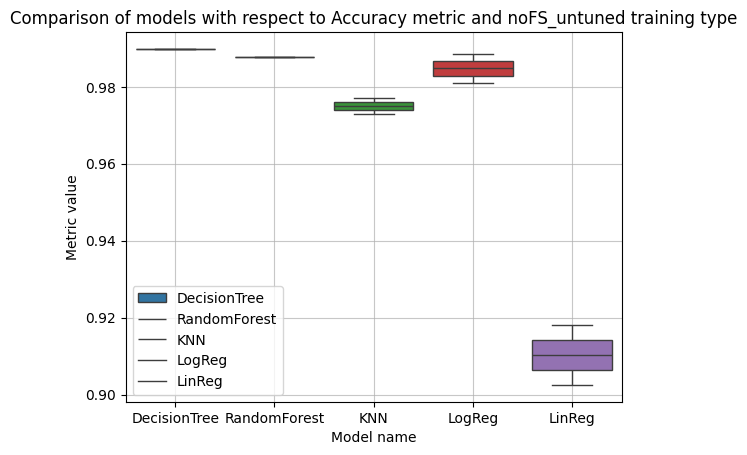

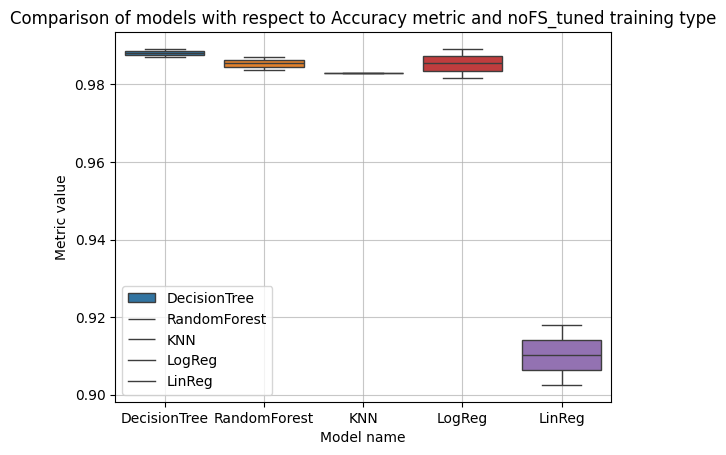

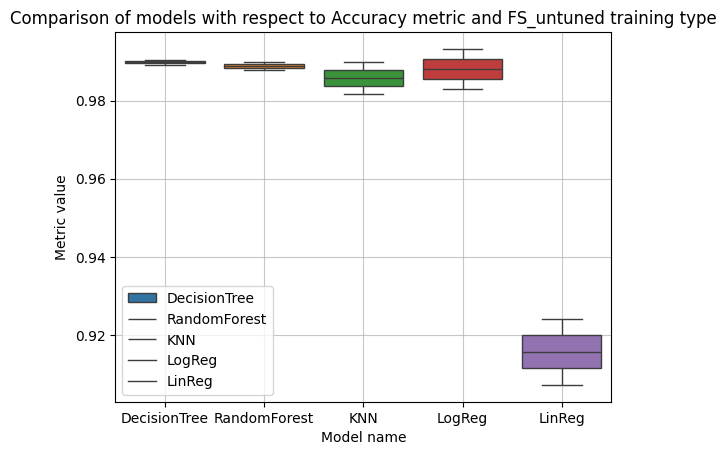

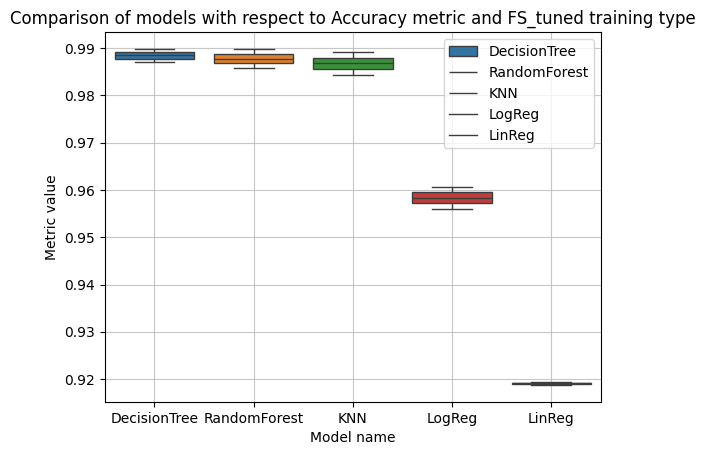

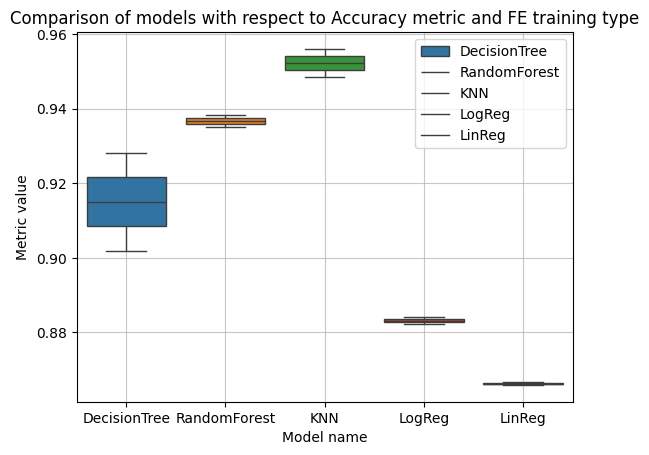

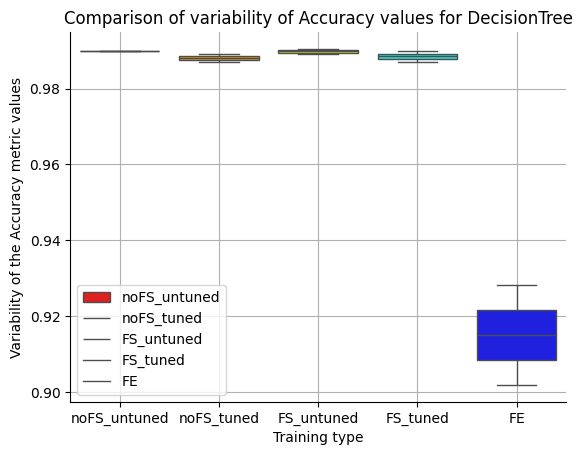

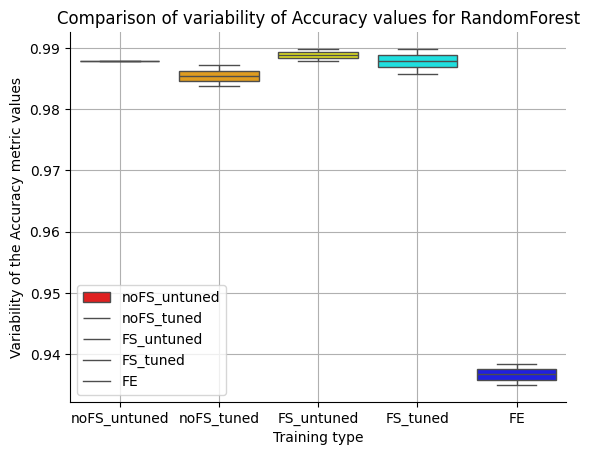

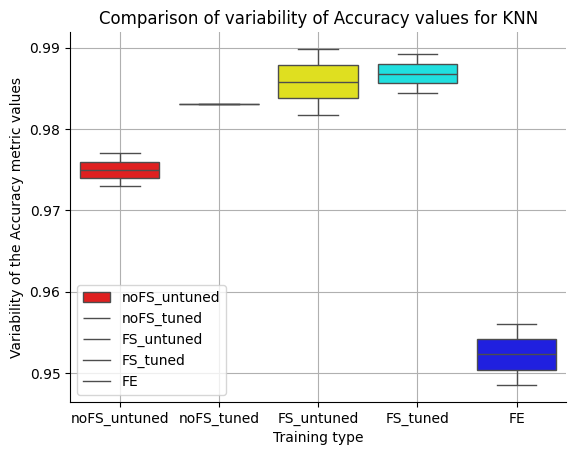

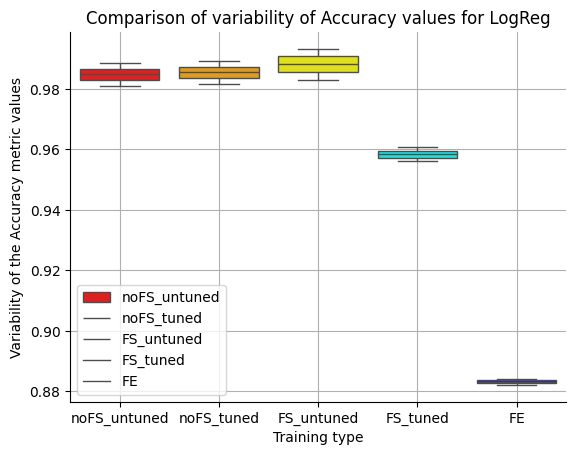

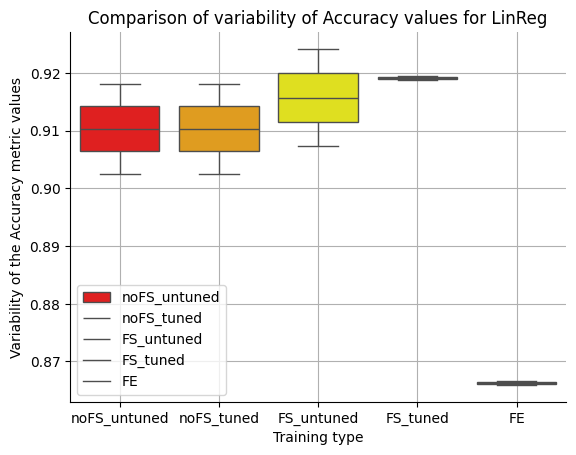

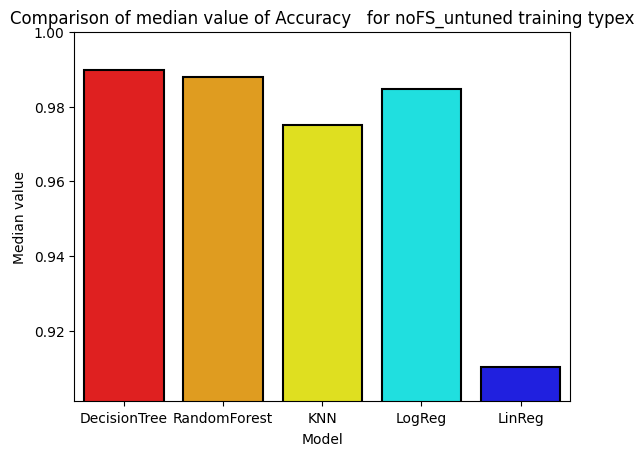

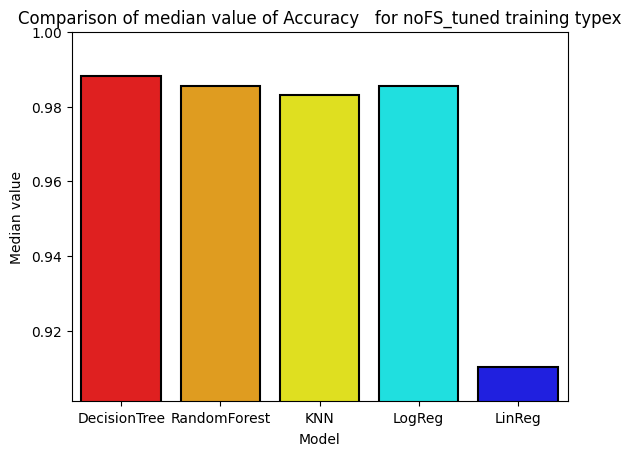

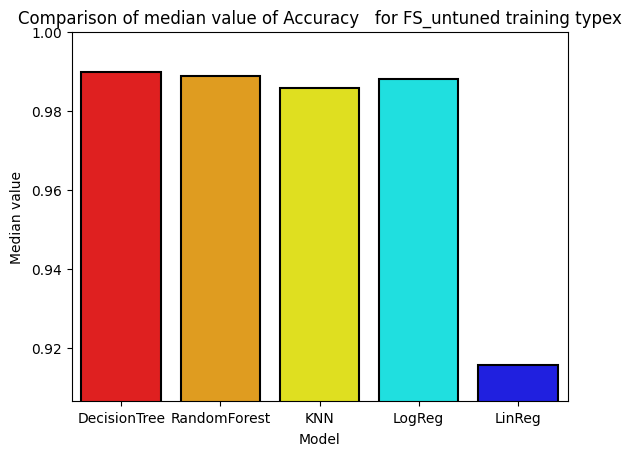

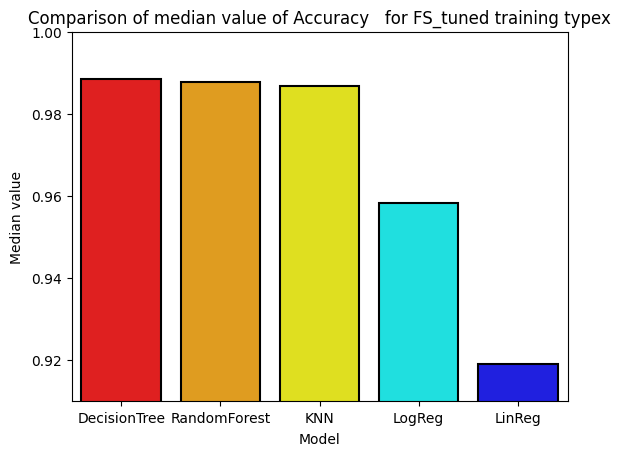

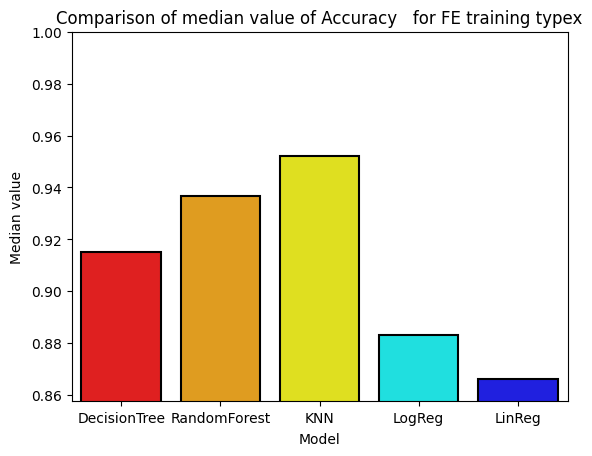

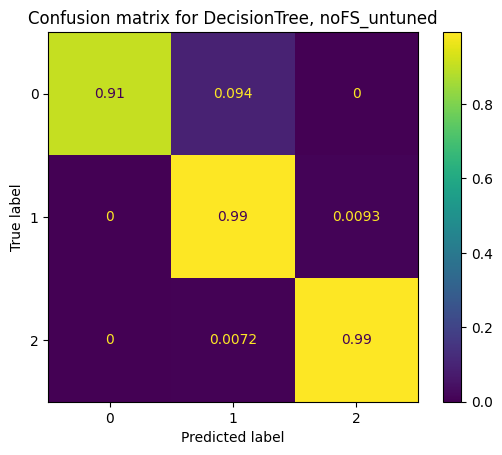

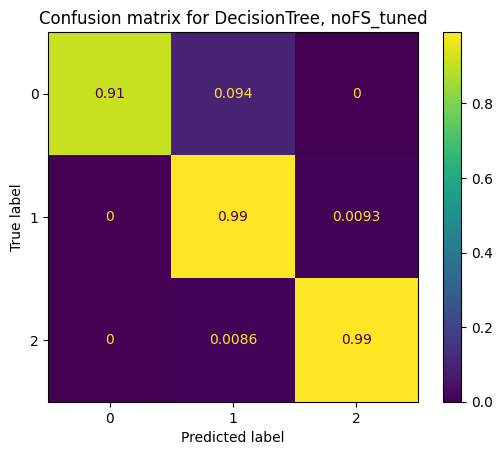

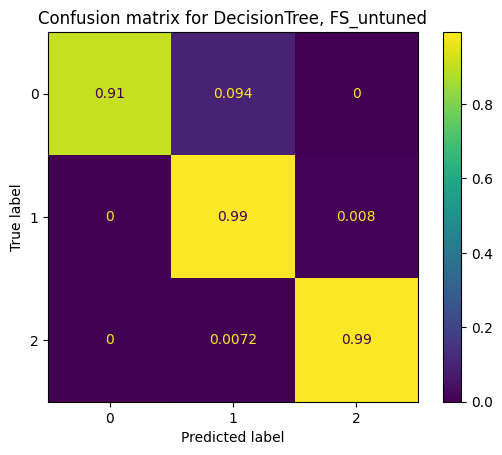

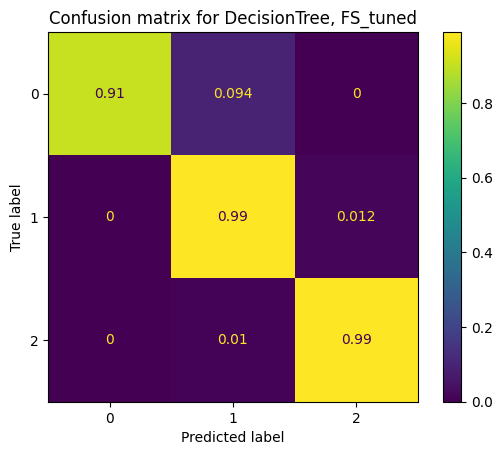

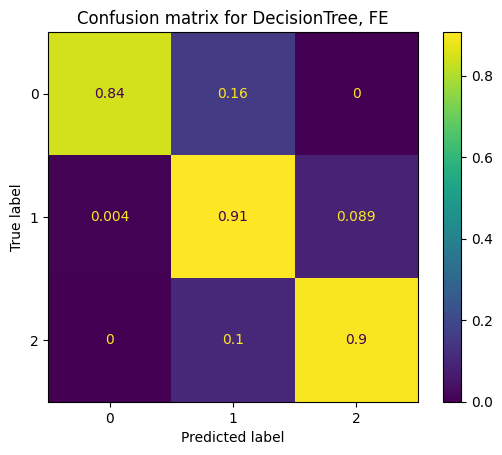

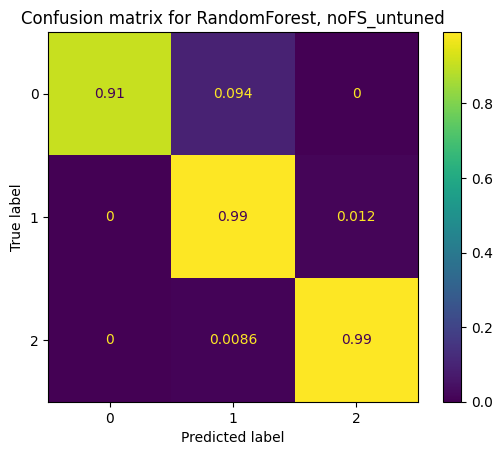

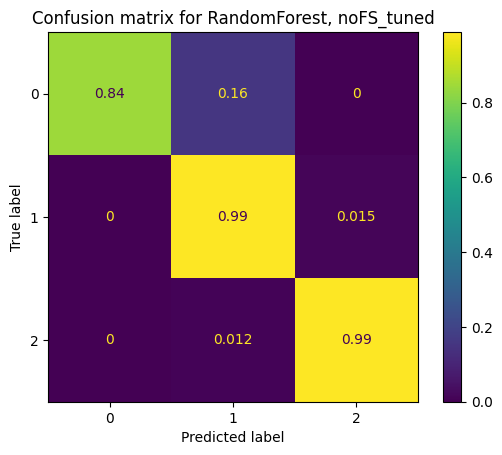

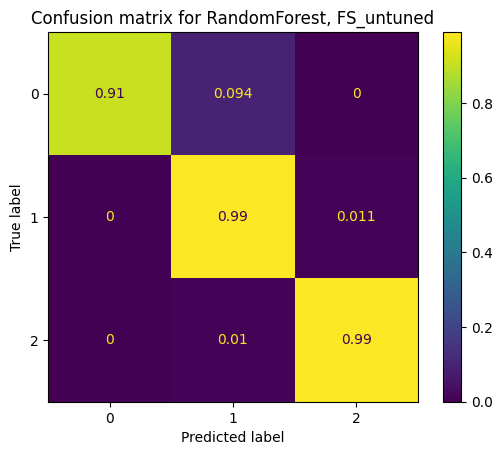

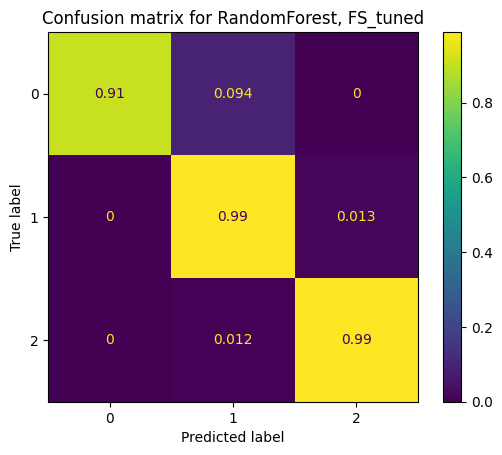

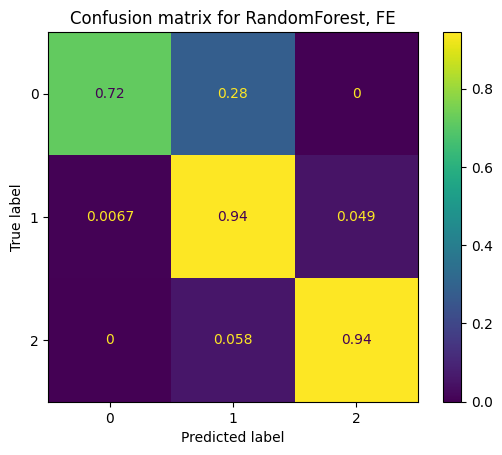

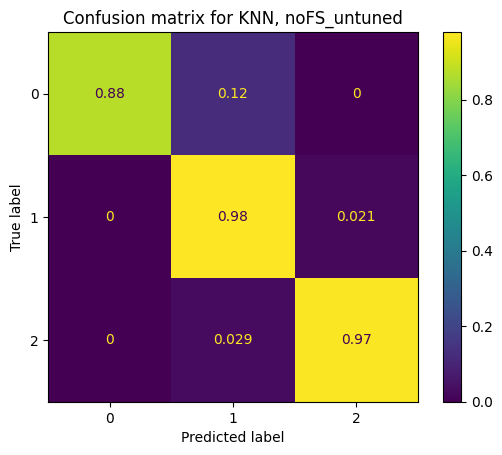

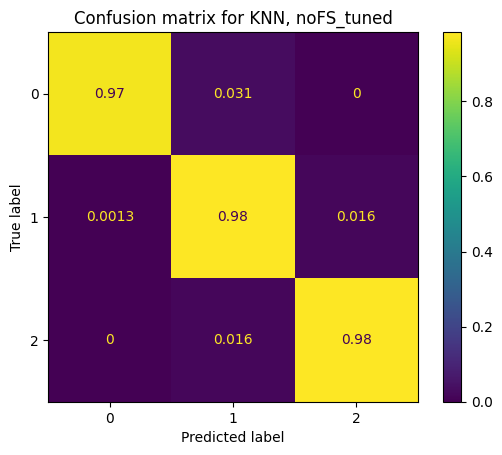

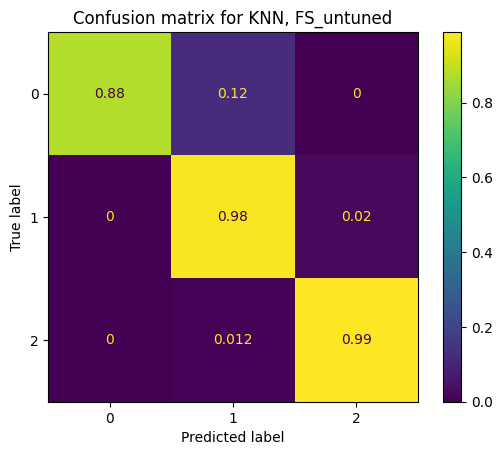

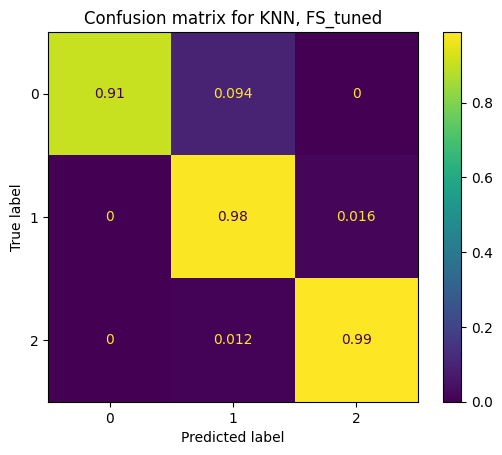

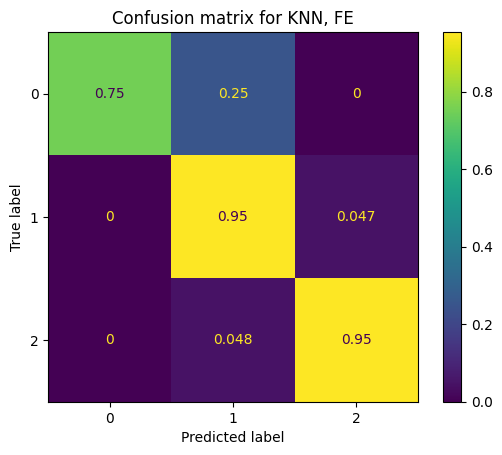

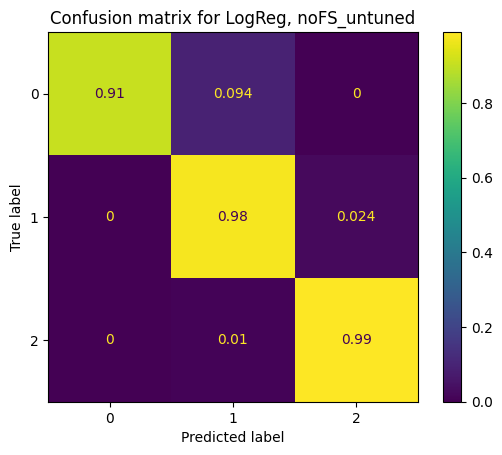

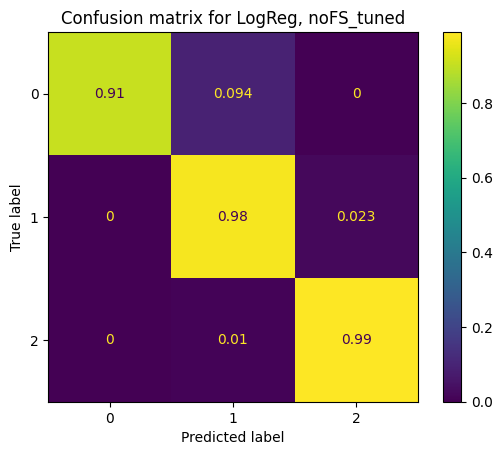

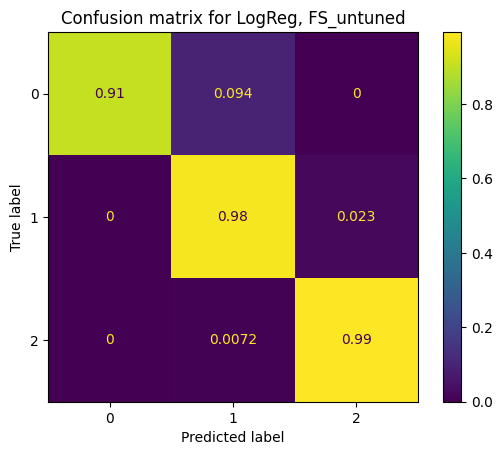

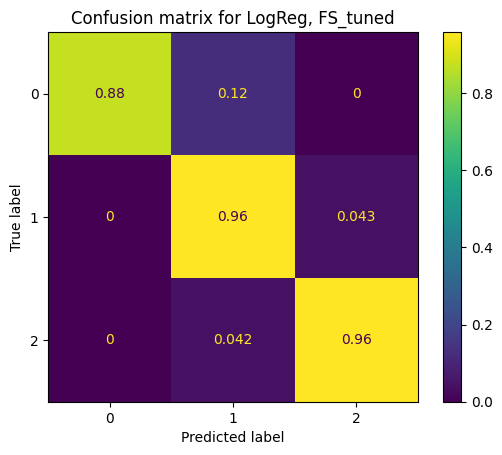

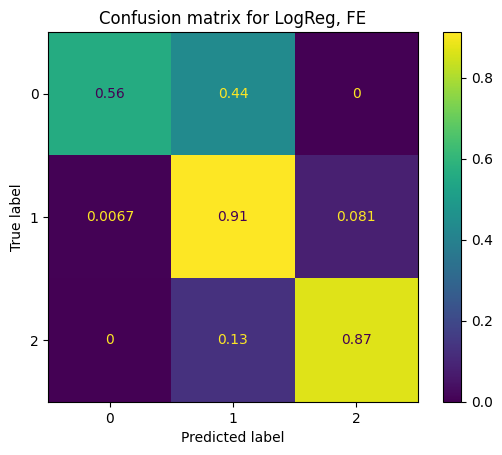

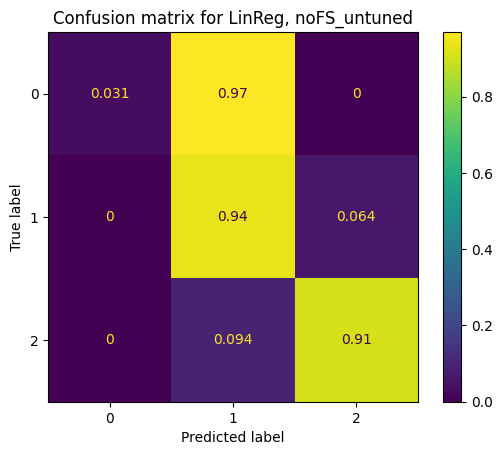

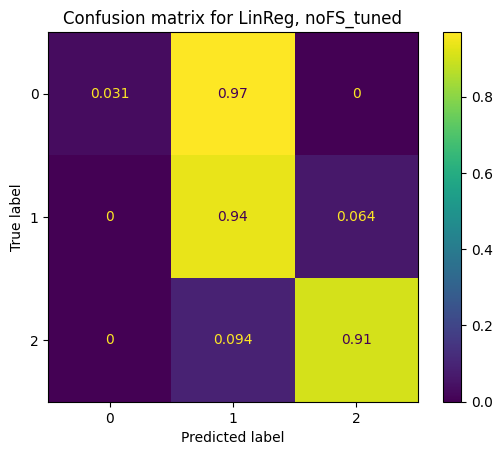

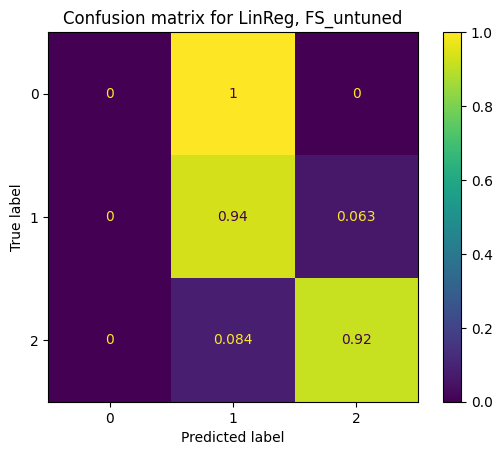

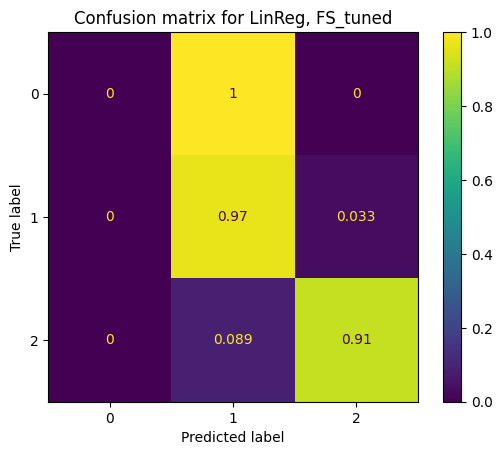

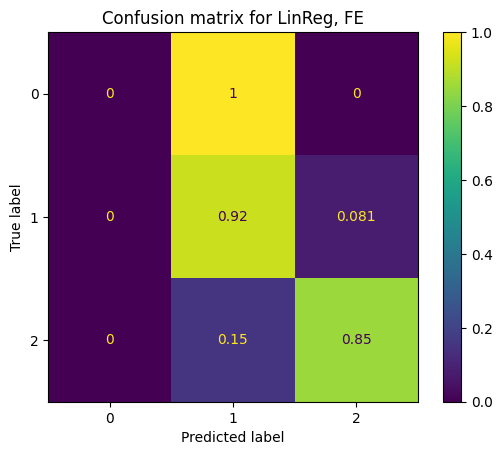

In [6]:
ModelComparator.compare_models()